# Football Players

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Data Exploration

In [62]:
# load the given dataset & check the data types 
players = pd.read_excel("Football_Players.xlsx")
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  43 non-null     int64  
 1   Comp    43 non-null     int64  
 2   Att     43 non-null     int64  
 3   Pct     43 non-null     float64
 4   Yds     43 non-null     int64  
 5   Avg     43 non-null     float64
 6   Yds/G   43 non-null     float64
 7   TD      43 non-null     int64  
 8   Int     43 non-null     int64  
dtypes: float64(3), int64(6)
memory usage: 3.1 KB


In [63]:
players.head()

,Player,Comp,Att,Pct,Yds,Avg,Yds/G,TD,Int
0,1,107,166,45.3,1172,7.1,167.5,12,4
1,2,238,353,47.3,2829,8.0,188.7,20,4
2,3,207,347,41.9,2324,6.7,145.3,20,9
3,4,252,392,44.9,2975,7.6,198.4,22,11
4,5,66,119,38.9,760,6.4,152.0,4,4


In [64]:
# get a glimse of the columns 
players.describe()

,Player,Comp,Att,Pct,Yds,Avg,Yds/G,TD,Int
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,22.000000,167.255814,268.837209,42.946512,1901.813953,6.932558,154.990698,12.837209,6.883721
std,12.556539,74.271091,111.945337,3.290632,869.447423,0.867322,30.364757,7.463978,3.403145
min,1.000000,38.000000,70.000000,34.400000,375.000000,4.900000,53.700000,0.000000,1.000000
25%,11.500000,87.500000,156.000000,41.350000,1132.000000,6.350000,135.250000,5.000000,4.000000
50%,22.000000,186.000000,309.000000,43.300000,2168.000000,6.800000,152.000000,14.000000,6.000000
75%,32.500000,232.000000,363.000000,44.950000,2531.000000,7.600000,178.300000,17.500000,10.000000
max,43.000000,270.000000,406.000000,50.400000,3203.000000,8.800000,200.300000,27.000000,17.000000


In [66]:
# Set a list with the columns used for clustering
X_features = list(players.columns)
X_features.remove("Player")
X_features

['Comp', 'Att', 'Pct', 'Yds', 'Avg', 'Yds/G', 'TD', 'Int']

## Scaling

In [67]:
# Standardize the data values 
scaler = StandardScaler()
scaled_players = scaler.fit_transform(players[X_features]) # scale only the columns in the list 

## Elbow Diagram

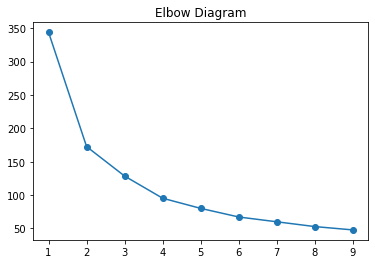

In [73]:
# To decide the number of clusters, create an Elbow Diagram 
cluster_range = range( 1, 10 )
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit(scaled_players)
    cluster_errors.append(clusters.inertia_)
plt.figure(figsize=(6,4))
plt.plot(cluster_range,cluster_errors, marker = "o");
plt.title("Elbow Diagram");

# the slope becomes notably moderate from point 4:
# K = 3

## Clustering the dataset

In [74]:
k = 3  # set the number of clusters
clusters = KMeans(k, random_state = 42)
clusters.fit(scaled_players)  # fit cluster using the scaled data values
players["Clusterid"] = clusters.labels_ # add the column for the drawn cluster id to the data frame
players.head(5) 

,Player,Comp,Att,Pct,Yds,Avg,Yds/G,TD,Int,Clusterid
0,1,107,166,45.3,1172,7.1,167.5,12,4,0
1,2,238,353,47.3,2829,8.0,188.7,20,4,2
2,3,207,347,41.9,2324,6.7,145.3,20,9,1
3,4,252,392,44.9,2975,7.6,198.4,22,11,2
4,5,66,119,38.9,760,6.4,152.0,4,4,0


### * check the size of each cluster assigned above

In [75]:
cluster_0 = players[players["Clusterid"] == 0]
len(cluster_0)

15

In [76]:
cluster_1 = players[players["Clusterid"] == 1]
len(cluster_1)

14

In [77]:
cluster_2 = players[players["Clusterid"] == 2]
len(cluster_2)

14

### ->  id = 0 is the largest size of cluster with 15

## Get the final cluster centers (Centroids)

In [87]:
# There are 3 points (k = 3)
clusters.cluster_centers_

array([[-1.23051139, -1.24947776, -0.58828214, -1.18767986, -0.38019118,
        -0.52218946, -1.03531842, -0.91686249],
       [ 0.42468312,  0.52700435, -0.14827938,  0.2619811 , -0.51296354,
        -0.38885118,  0.06080041,  0.9053054 ],
       [ 0.89372194,  0.81172182,  0.77858167,  1.01053303,  0.92031123,
         0.94833989,  1.04846932,  0.07704727]])

### * the cluster center corresponding to the largest size of cluster (id = 0)

In [84]:
clusters.cluster_centers_[0]

array([-1.23051139, -1.24947776, -0.58828214, -1.18767986, -0.38019118,
       -0.52218946, -1.03531842, -0.91686249])